200


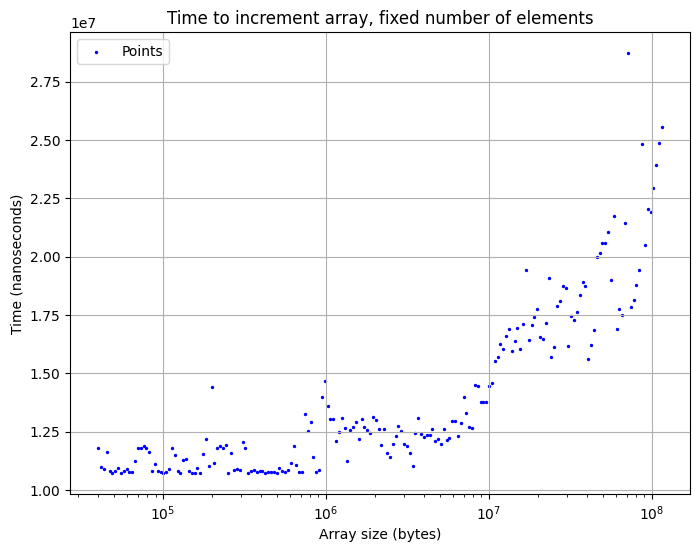

In [14]:
import matplotlib.pyplot as plt

# Function to read points from a file
def read_points_from_file(file_path):
    points = []
    with open(file_path, 'r') as file:
        for line in file:
            try:
                x, y = map(float, line.strip().split(','))  # Convert to float
                points.append((x, y))
            except ValueError:
                print(f"Skipping invalid line: {line.strip()}")
    return points

# File path to the text file (change to your file's path)
file_path = "cache_kicker_results.txt"
!
# Read points from file
points = read_points_from_file(file_path)

# Check if points are loaded
if points:
    # Unpack points into X and Y for plotting
    x_coords, y_coords = zip(*points)
    x_coords = [i*4 for i in x_coords]
    siz_avg = 14
    y_avg = [sum(y_coords[i:i+siz_avg])/siz_avg for i in range(len(y_coords) - siz_avg)]
    y_avg += (y_coords[len(y_coords) - siz_avg:])
    print(len(y_avg))
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', marker='o', label='Points', s=2)
    #plt.plot(x_coords, y_avg)
    plt.title("Time to increment array, fixed number of elements")
    plt.xlabel("Array size (bytes)")
    plt.ylabel("Time (nanoseconds)")
    plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid points to plot.")

200


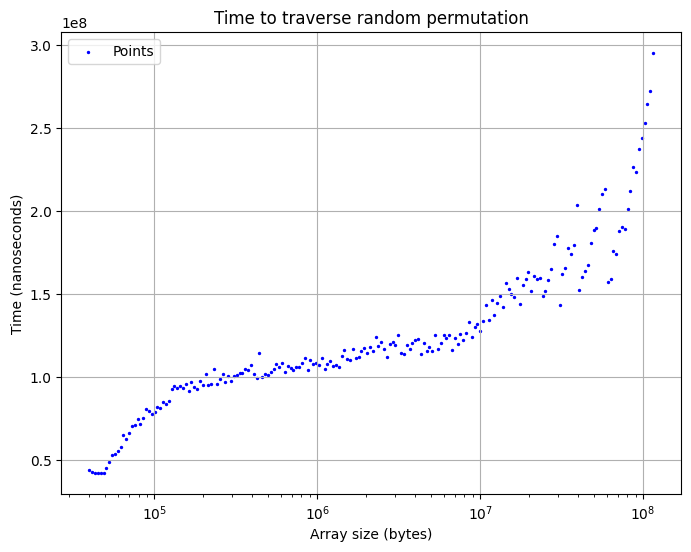

In [15]:
import matplotlib.pyplot as plt

# Function to read points from a file
def read_points_from_file(file_path):
    points = []
    with open(file_path, 'r') as file:
        for line in file:
            try:
                x, y = map(float, line.strip().split(','))  # Convert to float
                points.append((x, y))
            except ValueError:
                print(f"Skipping invalid line: {line.strip()}")
    return points

# File path to the text file (change to your file's path)
file_path = "cache_latency_results.txt"
!
# Read points from file
points = read_points_from_file(file_path)

# Check if points are loaded
if points:
    # Unpack points into X and Y for plotting
    x_coords, y_coords = zip(*points)
    x_coords = [i*4 for i in x_coords]
    siz_avg = 14
    y_avg = [sum(y_coords[i:i+siz_avg])/siz_avg for i in range(len(y_coords) - siz_avg)]
    y_avg += (y_coords[len(y_coords) - siz_avg:])
    print(len(y_avg))
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', marker='o', label='Points', s=2)
    #plt.plot(x_coords, y_avg)
    plt.title("Time to traverse random permutation")
    plt.xlabel("Array size (bytes)")
    plt.ylabel("Time (nanoseconds)")
    plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid points to plot.")

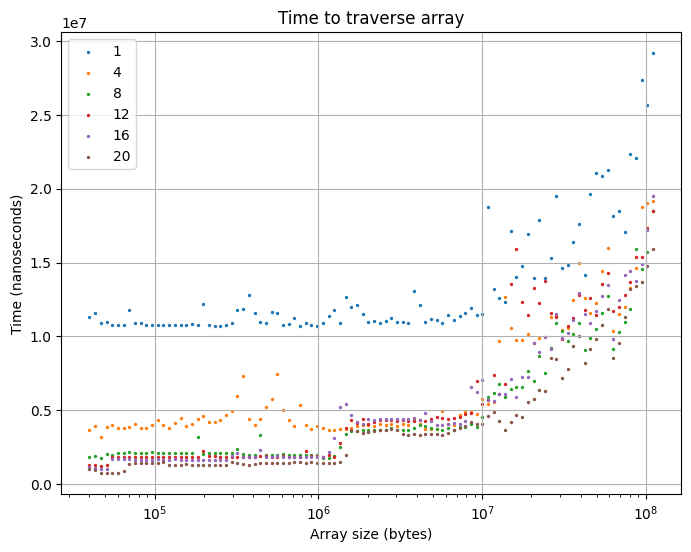

In [38]:
import matplotlib.pyplot as plt

# Function to read points from a file
def read_points_from_file(file_path):
    points = {}
    with open(file_path, 'r') as file:
        for line in file:
            try:
                stride, x, y = map(float, line.strip().split(','))  # Convert to float
                if int(stride) in points.keys():
                    points[int(stride)].append((x, y))
                else:
                    points[int(stride)] = [(x, y)]
            except ValueError:
                print(f"Skipping invalid line: {line.strip()}")
    return points

# File path to the text file (change to your file's path)
file_path = "cache_lanes_results.txt"

# Read points from file
points = read_points_from_file(file_path)

plt.figure(figsize=(8, 6))
plt.title("Time to traverse array")
plt.xlabel("Array size (bytes)")
plt.ylabel("Time (nanoseconds)")
plt.xscale('log')
plt.grid(True)
# Check if points are loaded
if points:
    # Unpack points into X and Y for plotting
    for stride in [i for i in points.keys() if i == 1 or i == 4 or i == 8 or i == 12 or i == 16 or i == 20]:
        clean = [i for i in points[stride] if stride*i[1] < 3.5e8]
        x_coords, y_coords = zip(*(clean))
        x_coords = [i*4 for i in x_coords]
        y_coords = [i for i in y_coords]
        siz_avg = 14
        y_avg = [sum(y_coords[i:i+siz_avg])/siz_avg for i in range(len(y_coords) - siz_avg)]
        y_avg += (y_coords[len(y_coords) - siz_avg:])
        #print(len(y_avg))
        # Plotting
        plt.scatter(x_coords, y_coords, marker='o', s=2, label=stride)
        #plt.plot(x_coords, y_avg)

        plt.legend()

else:
    print("No valid points to plot.")

plt.show()